## Análisis Exploratorio de Datos

Importar librerías:

In [56]:
# importar bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Antes de analizar y graficar los datos, leemos y verificamos su estructura y valores erroneos una vez más:**

**Reviews**

In [57]:
df_review= pd.read_csv('reviews.csv')

In [58]:
df_review.head(3)

,user_id,funny,item_id,helpful,recommend,sentiment_analysis
0,Wackky,1 person found this review funny,550,1 of 1 people (100%) found this review helpful,True,1
1,kevinator23,1 person found this review funny,218620,2 of 5 people (40%) found this review helpful,True,0
2,Lord_Exploit,1 person found this review funny,311560,6 of 10 people (60%) found this review helpful,True,2


In [59]:
#  Estadísticas resumidas de columnas numéricas
df_review.describe() 

,item_id,sentiment_analysis
count,1160.000000,1160.000000
mean,200803.100862,1.200000
std,146467.734197,0.893655
min,20.000000,0.000000
25%,12210.000000,0.000000
50%,230410.000000,2.000000
75%,315807.500000,2.000000
max,516040.000000,2.000000


**Items**

In [60]:
df_items = pd.read_csv('items.csv')


In [61]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   item_id           int64 
 3   item_name         object
 4   playtime_forever  int64 
 5   playtime_2weeks   int64 
dtypes: int64(4), object(2)
memory usage: 233.2+ MB


In [62]:
# Analizamos la columna 'item_name' en busca de valores nulos
columna_item_name = df_items['item_name'] # Selecciono la columna 'item_name'
valores_nulos = columna_item_name.isnull().sum()  # Cuento la cantidad de valores nulos en la columna

# Muestro la cantidad de valores nulos y los primeros valores no nulos en la columna
print(f"Valores nulos en la columna 'item_name': {valores_nulos}")
print("\nPrimeros valores no nulos en la columna:")
print(columna_item_name.dropna().head())  # Muestro los primeros valores no nulos

Valores nulos en la columna 'item_name': 1090

Primeros valores no nulos en la columna:
0              CounterStrike
1      Team Fortress Classic
2              Day of Defeat
3         Deathmatch Classic
4    HalfLife Opposing Force
Name: item_name, dtype: object


In [63]:
# Eliminar las filas con valores nulos en todo el DataFrame
df_items.dropna(inplace=True)

# Verificar que se hayan eliminado
valores_nulos_despues = df_items.isnull().sum()
valores_nulos_despues 

user_id             0
items_count         0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

In [64]:
# include='all' proporciona un resumen adicional de los datos
df_items.describe(include='all')

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
count,5093015,5.093015e+06,5.093015e+06,5093015,5.093015e+06,5.093015e+06
unique,70912,NaN,NaN,10730,NaN,NaN
top,phrostb,NaN,NaN,Dota Test,NaN,NaN
freq,7760,NaN,NaN,49136,NaN,NaN
mean,NaN,3.156817e+02,1.783790e+05,NaN,9.907150e+02,9.070876e+00
std,NaN,6.968559e+02,1.318627e+05,NaN,5.414788e+03,1.403294e+02
min,NaN,1.000000e+00,1.000000e+01,NaN,0.000000e+00,0.000000e+00
25%,NaN,7.100000e+01,3.445000e+04,NaN,0.000000e+00,0.000000e+00
50%,NaN,1.370000e+02,2.144200e+05,NaN,3.400000e+01,0.000000e+00
75%,NaN,2.750000e+02,2.664300e+05,NaN,3.550000e+02,0.000000e+00


**Games**

In [65]:
df_games= pd.read_csv('games.csv')

In [66]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22510 entries, 0 to 22509
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22475 non-null  object 
 1   genres        22510 non-null  object 
 2   app_name      22491 non-null  object 
 3   title         22491 non-null  object 
 4   release_date  22510 non-null  object 
 5   tags          22510 non-null  object 
 6   specs         22510 non-null  object 
 7   price         22510 non-null  object 
 8   id            22510 non-null  float64
 9   developer     22463 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.7+ MB


In [67]:
# verificar nulos
valores_nulosG = df_games.isnull().sum()
valores_nulosG

publisher       35
genres           0
app_name        19
title           19
release_date     0
tags             0
specs            0
price            0
id               0
developer       47
dtype: int64

In [68]:
# Eliminar las filas con valores nulos en todo el DataFrame
df_games.dropna(inplace=True)

# Verifico que se hayan eliminado
valores_nulos_despues = df_games.isnull().sum()

# Muestro la cantidad de valores nulos después de eliminarlos
valores_nulos_despues

publisher       0
genres          0
app_name        0
title           0
release_date    0
tags            0
specs           0
price           0
id              0
developer       0
dtype: int64

In [69]:
df_games.describe()

,id
count,2.244600e+04
mean,4.301950e+05
std,1.917656e+05
min,1.000000e+01
25%,3.020375e+05
50%,4.260500e+05
75%,5.798200e+05
max,2.028850e+06


In [70]:
# Cambiar nombre y tipo de dato a 'id' para hacer más sencilla su manipulación

df_games['id'] = df_games['id'].astype('int64')
df_games = df_games.rename(columns={'id': 'item_id'})

In [71]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22446 entries, 0 to 22509
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     22446 non-null  object
 1   genres        22446 non-null  object
 2   app_name      22446 non-null  object
 3   title         22446 non-null  object
 4   release_date  22446 non-null  object
 5   tags          22446 non-null  object
 6   specs         22446 non-null  object
 7   price         22446 non-null  object
 8   item_id       22446 non-null  int64 
 9   developer     22446 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.9+ MB


## Algunos gráficos para comprender mejor los datos:

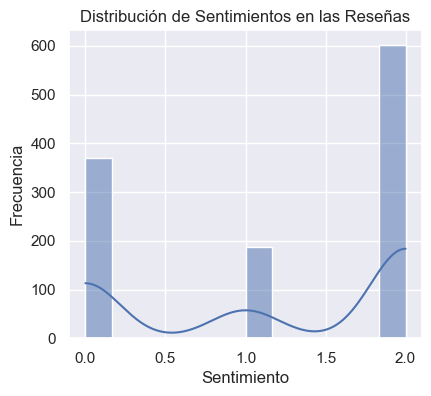

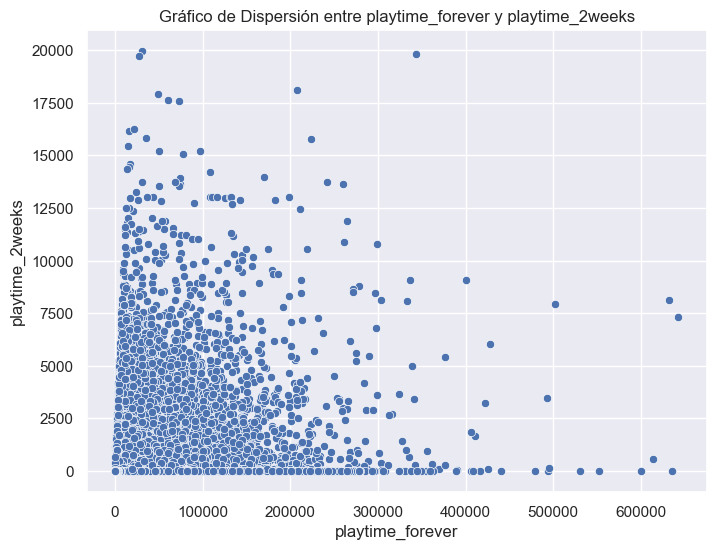

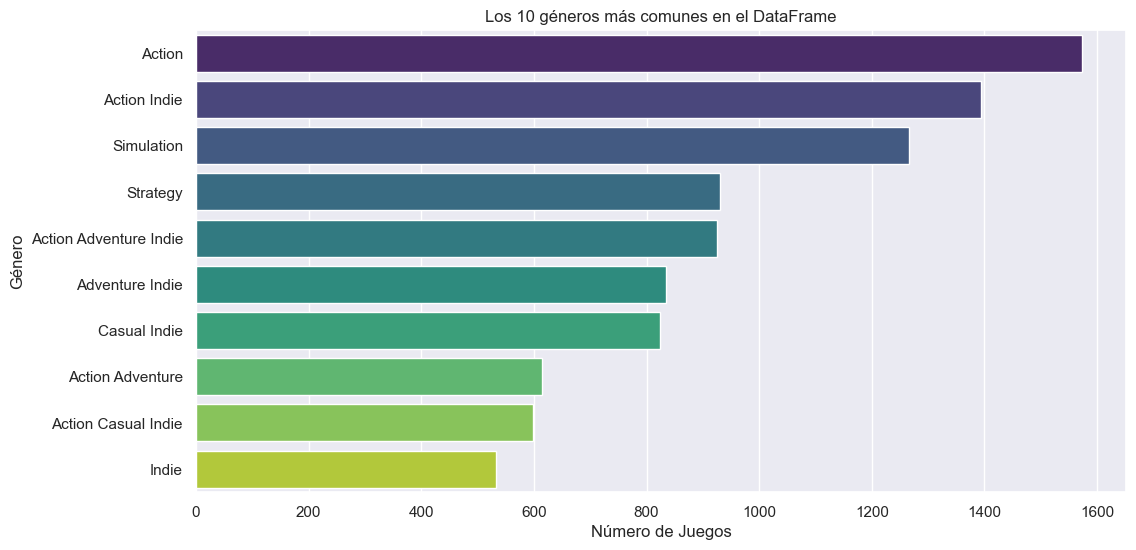

In [72]:
# Creación de un histograma para la columna 'sentiment_analysis'
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_review['sentiment_analysis'], kde=True)
plt.title('Distribución de Sentimientos en las Reseñas')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Crear un gráfico de dispersión para mi Dataframe 'df_items' 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_items, x='playtime_forever', y='playtime_2weeks')
plt.title('Gráfico de Dispersión entre playtime_forever y playtime_2weeks')
plt.xlabel('playtime_forever')
plt.ylabel('playtime_2weeks')
plt.show()

# Esto agrupa los valores y cuenta cuántas veces aparece cada uno
genres_counts = df_games['genres'].value_counts()

# Voy a crear un gráfico de barras para 'df_games' 
plt.figure(figsize=(12, 6))  # Establece el tamaño del gráfico
sns.barplot(x=genres_counts[:10], y=genres_counts.index[:10], palette="viridis")

# etiquetamos
plt.xlabel("Número de Juegos")
plt.ylabel("Género")
plt.title("Los 10 géneros más comunes en el DataFrame")
plt.show()

## Creación de archivos para las funciones requeridas 

In [73]:
# Selecciona las columnas 'genres' y 'release_date' del DataFrame df_games
df_PlayTimeGenre = df_games[['genres', 'release_date']]

# Selecciona la columna 'playtime_forever' del DataFrame df_items
df_items_subset = df_items[['playtime_forever','item_id']]

# Combina las columnas seleccionadas en un nuevo DataFrame
PlayTimeGenre = pd.concat([df_PlayTimeGenre, df_items_subset], axis=1)

In [74]:
PlayTimeGenre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5093020 entries, 0 to 5094104
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   genres            object 
 1   release_date      object 
 2   playtime_forever  float64
 3   item_id           float64
dtypes: float64(2), object(2)
memory usage: 194.3+ MB


In [75]:
#Eliminando valores nulos para reducir tamaño
PlayTimeGenre.dropna(inplace=True)

In [76]:
PlayTimeGenre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22441 entries, 0 to 22509
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            22441 non-null  object 
 1   release_date      22441 non-null  object 
 2   playtime_forever  22441 non-null  float64
 3   item_id           22441 non-null  float64
dtypes: float64(2), object(2)
memory usage: 876.6+ KB


In [77]:
PlayTimeGenre.to_csv('PlayTimeGenre.csv', index=False)

In [78]:
# Selecciona las columnas 'genres' y 'release_date' del DataFrame df_games
df_UserForGenre = df_games[['genres', 'release_date']]

# Selecciona la columna 'playtime_forever' del DataFrame df_items
df_items_subset = df_items[['playtime_forever','user_id']]

# Combina las columnas seleccionadas en un nuevo DataFrame
UserForGenre = pd.concat([df_UserForGenre, df_items_subset], axis=1)

In [79]:
UserForGenre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5093020 entries, 0 to 5094104
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   genres            object 
 1   release_date      object 
 2   playtime_forever  float64
 3   user_id           object 
dtypes: float64(1), object(3)
memory usage: 194.3+ MB


In [80]:
UserForGenre.dropna(inplace=True)

In [81]:
UserForGenre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22441 entries, 0 to 22509
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            22441 non-null  object 
 1   release_date      22441 non-null  object 
 2   playtime_forever  22441 non-null  float64
 3   user_id           22441 non-null  object 
dtypes: float64(1), object(3)
memory usage: 876.6+ KB


In [82]:
UserForGenre.to_csv('UserForGenre.csv', index=False)

In [83]:
# Selecciona las columnas 'title' y 'release_date' del DataFrame df_games
df_UsersRecommend = df_games[['title', 'release_date']]

# Selecciona la columna 'recommend', 'user_id' del DataFrame df_review
df_review_subset = df_review[['recommend','user_id','sentiment_analysis']]

# Combina las columnas seleccionadas en un nuevo DataFrame
UsersRecommend = pd.concat([df_UsersRecommend, df_review_subset], axis=1)

In [84]:
UsersRecommend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22447 entries, 0 to 3
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               22446 non-null  object 
 1   release_date        22446 non-null  object 
 2   recommend           1160 non-null   object 
 3   user_id             1160 non-null   object 
 4   sentiment_analysis  1160 non-null   float64
dtypes: float64(1), object(4)
memory usage: 1.0+ MB


In [85]:
UsersRecommend.dropna(inplace=True)

In [86]:
UsersRecommend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159 entries, 0 to 1159
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1159 non-null   object 
 1   release_date        1159 non-null   object 
 2   recommend           1159 non-null   object 
 3   user_id             1159 non-null   object 
 4   sentiment_analysis  1159 non-null   float64
dtypes: float64(1), object(4)
memory usage: 54.3+ KB


In [87]:
UsersRecommend.to_csv('UsersRecommend.csv', index=False)

In [88]:
# Selecciona las columnas 'title' y 'release_date' del DataFrame df_games
df_UsersWorstDeveloper = df_games[['title', 'release_date']]

# Selecciona la columna 'recommend', 'user_id' del DataFrame df_review
df_review_subset = df_review[['recommend','user_id']]

# Combina las columnas seleccionadas en un nuevo DataFrame
UsersWorstDeveloper = pd.concat([df_UsersWorstDeveloper , df_review_subset], axis=1)

In [89]:
UsersWorstDeveloper.dropna(inplace=True)

In [90]:
UsersWorstDeveloper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159 entries, 0 to 1159
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1159 non-null   object
 1   release_date  1159 non-null   object
 2   recommend     1159 non-null   object
 3   user_id       1159 non-null   object
dtypes: object(4)
memory usage: 45.3+ KB


In [91]:
UsersWorstDeveloper.to_csv('UsersWorstDeveloper.csv', index=False)

SENTIMENT ANALYSIS

In [92]:
# Selecciona las columnas 'title' y 'release_date' del DataFrame df_games
df_sentiment_analysis = df_games[['developer']]

# Selecciona la columna 'recommend', 'user_id' del DataFrame df_review
df_review_subset = df_review[['sentiment_analysis','user_id']]

# Combina las columnas seleccionadas en un nuevo DataFrame
sentiment_analysis = pd.concat([df_sentiment_analysis, df_review_subset], axis=1)

In [93]:
sentiment_analysis.dropna(inplace=True)

In [94]:
sentiment_analysis.head()

,developer,sentiment_analysis,user_id
0,Kotoshiro,1.0,Wackky
1,Secret Level SRL,0.0,kevinator23
2,Poolianscom,2.0,Lord_Exploit
4,Trickjump Games Ltd,1.0,2768820078
5,Poppermost Productions,2.0,1337lolroflmao


In [95]:
sentiment_analysis.to_csv('sentiment_analysis.csv', index=False)

**Creando DataFrame para el Modelo ML:**

In [96]:
# Selecciona las columnas 'title' y 'release_date' del DataFrame df_games
frame1= df_items[['user_id']]

# Selecciona la columna 'recommend', 'user_id' del DataFrame df_review
frame2= df_games[['genres', 'app_name' ,'item_id']]

# Combina las columnas seleccionadas en un nuevo DataFrame
framefinal= pd.concat([frame1, frame2], axis=1)

In [97]:
framefinal.head(5)

,user_id,genres,app_name,item_id
0,76561197970982479,Action Casual Indie Simulation Strategy,Lost Summoner Kitty,761140.0
1,76561197970982479,Free to Play Indie RPG Strategy,Ironbound,643980.0
2,76561197970982479,Casual Free to Play Indie Simulation Sports,Real Pool D Poolians,670290.0
3,76561197970982479,NaN,NaN,NaN
4,76561197970982479,Action Adventure Simulation,Battle Royale Trainer,772540.0


In [98]:
framefinal.dropna(inplace=True)
framefinal = framefinal.drop_duplicates()

In [99]:
framefinal.to_csv('Frame_ML.csv', index=False)